In [144]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px

In [145]:
time_periods = ["1d","5d","1mo","60d","3mo","6mo","1y","2y","5y","10y","ytd","max"]
valid_intervals= ["1m","2m","2m","2m","1h","1h","1h","1h","1d","1d","1d","1d"]

In [158]:
ticker = "AAPL"
idx = -1

In [163]:
def interval_to_df(ticker, time_periods, valid_intervals):
    ticker_data = yf.download(
        ticker,
        period = time_periods,
        interval = valid_intervals,
        progress = False
    )
    ticker_close = pd.DataFrame(ticker_data["Adj Close"])
    ticker_close.index = pd.to_datetime(ticker_close.index)
    ticker_close = ticker_close.rename(columns = {"Adj Close": "Close"})
    ticker_close.index.rename("Date", inplace = True)
    return ticker_close

In [166]:
def max_interval_to_df(ticker):
    ticker_data = yf.download(
        ticker,
        period = "max",
        interval = "1d",
        progress = False
    )
    ticker_close = pd.DataFrame(ticker_data["Adj Close"])
    ticker_close.index = pd.to_datetime(ticker_close.index)
    ticker_close = ticker_close.rename(columns = {"Adj Close": "Close"})
    ticker_close.index.rename("Date", inplace = True)
    return ticker_close

In [164]:
ticker_df = interval_to_df(ticker, time_periods[idx], valid_intervals[idx])
ticker_df

,Close
Date,
1980-12-12,0.404953
1980-12-15,0.383825
1980-12-16,0.355655
1980-12-17,0.364458
1980-12-18,0.375022
...,...
2020-08-21,497.480011
2020-08-24,503.429993
2020-08-25,499.299988


In [148]:
import plotly.graph_objs as go

In [169]:
def chart_ticker(ticker, ticker_df):
    ticker_plot = px.line(
        ticker_df,
        x = ticker_df.index ,
        y = "Close",
        title = ticker,
        labels = {"Close":"Price ($)", "Date":"Time"}
    )
    ticker_plot.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=5, label="5d", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=2, label="2m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=2, label="2y", step="year", stepmode="backward"),
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(count=10, label="10y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    return ticker_plot.show()

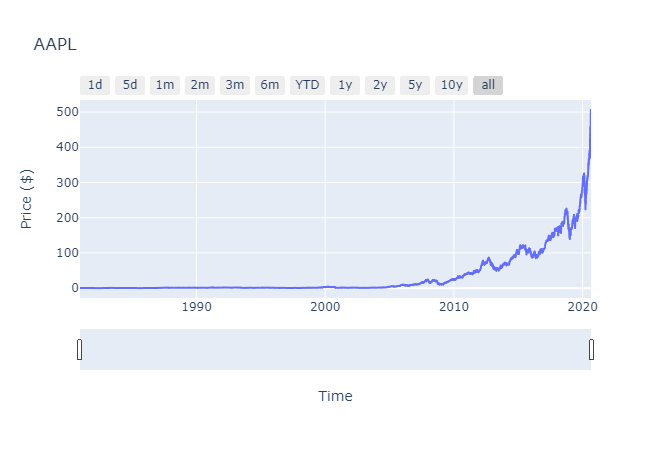

In [150]:
#chart_ticker(ticker_df)

In [151]:
def get_60d_df(ticker):
    idx = 3
    ticker_df = interval_to_df(ticker, time_periods[idx], valid_intervals[idx])
    return ticker_df

In [152]:
def get_60d_price_chart(ticker):
    ticker_df = get_60d_df(ticker)
    ticker_plot = px.line(
        ticker_df,
        x = ticker_df.index ,
        y = "Close",
        title = ticker,
        labels = {"Close":"Price ($)", "Date":"Time"}
    )
    return ticker_plot.show()
    return ticker_plot.show()

In [153]:
get_60d_df(ticker)

,Close
Date,
2020-07-13 09:30:00-04:00,389.920013
2020-07-13 09:32:00-04:00,390.562805
2020-07-13 09:34:00-04:00,390.760010
2020-07-13 09:36:00-04:00,391.660004
2020-07-13 09:38:00-04:00,392.006409
...,...
2020-08-27 15:50:00-04:00,500.779999
2020-08-27 15:52:00-04:00,500.809998
2020-08-27 15:54:00-04:00,500.899994


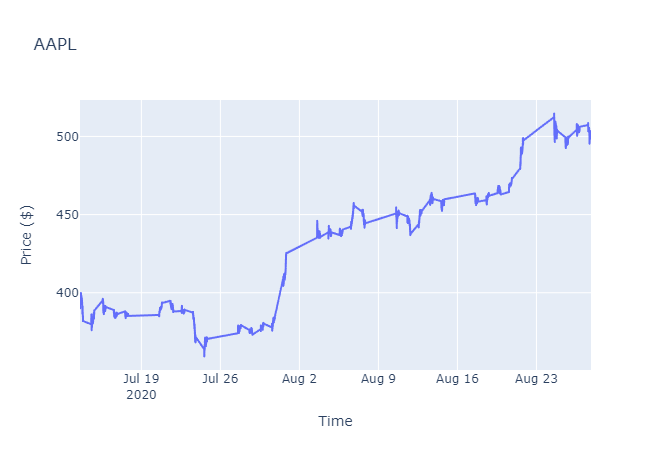

In [154]:
#get_60d_price_chart(ticker)

# Panel Functions

In [170]:
def get_ticker_chart_pn():
    ticker = input("Enter a Ticker:")
    ticker_df = max_interval_to_df(ticker)
    chart_ticker(ticker, ticker_df)

Enter a Ticker: TSLA


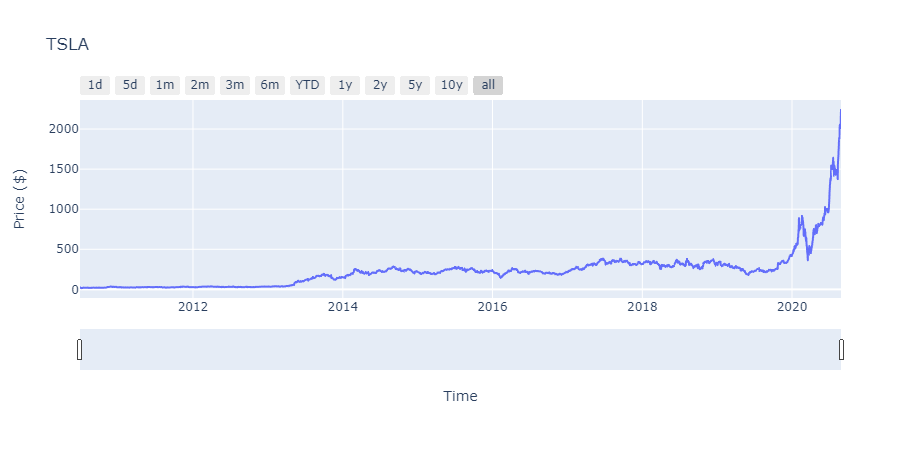

In [171]:
get_ticker_chart_pn()